# Loading Data

In [2954]:
import pandas as pd
import numpy as np
import random
random.seed(42)

In [2955]:
!pip3 install ucimlrepo

In [2956]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

# Data Visualization
Identifying trends between features in our dataset and how they relate to the label

In [2974]:
X.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [2975]:
y[:15]

,num
0,0
1,2
2,1
3,0
4,0
5,0
6,3
7,0
8,2
9,1


In [2976]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Count'>

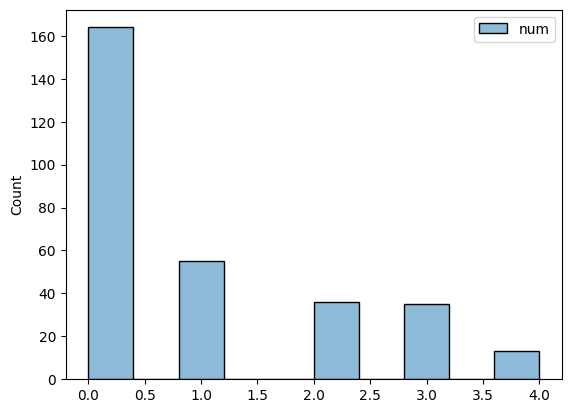

In [2977]:
sns.histplot(y)

<Axes: xlabel='age', ylabel='Count'>

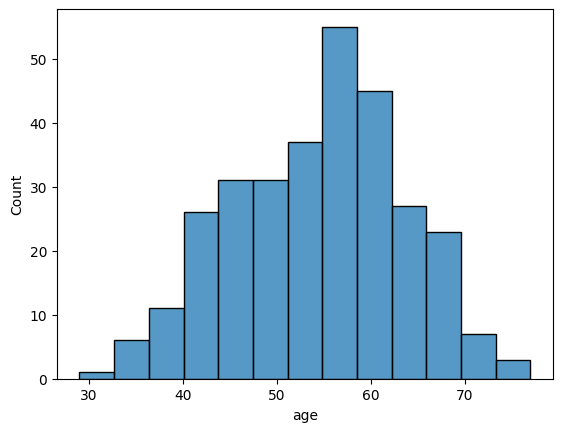

In [2978]:
sns.histplot(X['age'])

<Axes: xlabel='sex', ylabel='Count'>

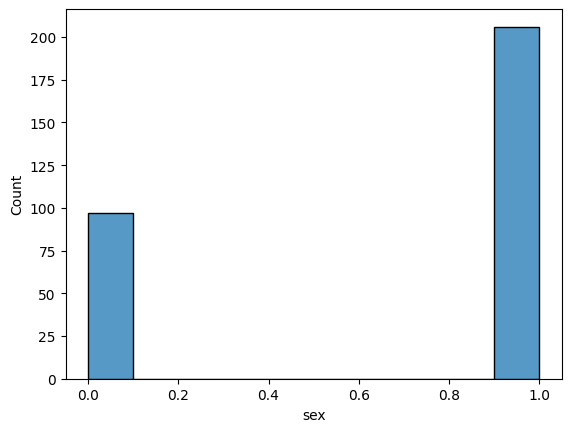

In [2979]:
sns.histplot(X['sex'])

<Axes: ylabel='Count'>

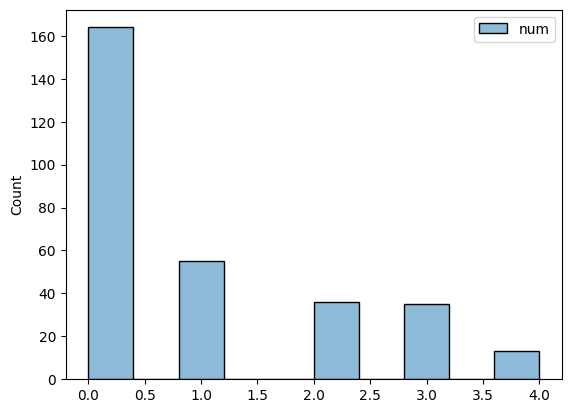

In [2980]:
sns.histplot(y)

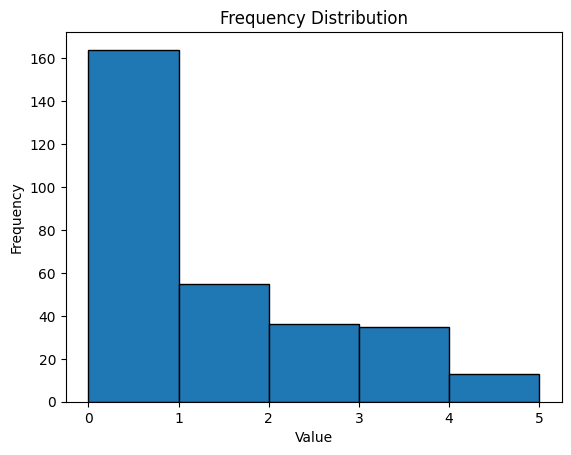

In [2981]:
plt.hist(y, bins=range(0, 6), edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')
plt.show()

In [2982]:
X['label'] = y

In [2983]:
#sns.catplot(data=X, x=X['sex'], hue='label', kind='swarm')

<Axes: xlabel='age', ylabel='Count'>

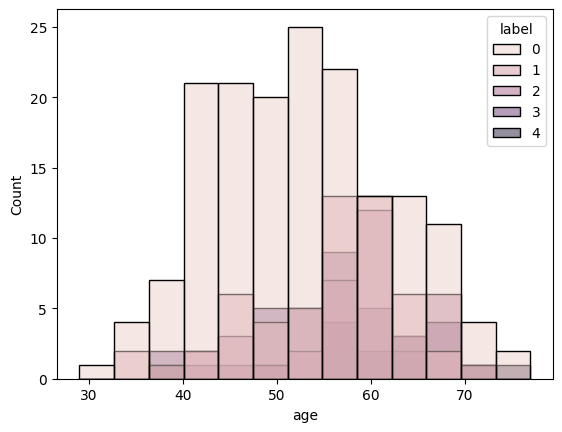

In [2967]:
sns.histplot(data=X, x=X['age'],hue='label')

In [2968]:
#sns.catplot(data=X, x=X['fbs'],hue='label',kind="swarm")

In [2969]:
X.groupby(['fbs', 'label']).count()

age  sex   cp  trestbps  chol  restecg  thalach  exang  oldpeak  \
fbs label                                                                    
0   0      141  141  141       141   141      141      141    141      141   
    1       51   51   51        51    51       51       51     51       51   
    2       27   27   27        27    27       27       27     27       27   
    3       27   27   27        27    27       27       27     27       27   
    4       12   12   12        12    12       12       12     12       12   
1   0       23   23   23        23    23       23       23     23       23   
    1        4    4    4         4     4        4        4      4        4   
    2        9    9    9         9     9        9        9      9        9   
    3        8    8    8         8     8        8        8      8        8   
    4        1    1    1         1     1        1        1      1        1   

           slope   ca  thal  
fbs label                    
0   0        141  138   140  
    1         51   51    51  
    2         27   27    27  
    3         27   27    27  
    4         12   12    12  
1   0         23   23    23  
    1          4    3     4  
    2          9    9     8  
    3          8    8     8  
    4          1    1     1

In [2970]:
#sns.catplot(data=X, x=X['restecg'],hue='label',kind='swarm')

In [2971]:
X.groupby(['restecg','label']).count()

age  sex  cp  trestbps  chol  fbs  thalach  exang  oldpeak  \
restecg label                                                               
0       0       95   95  95        95    95   95       95     95       95   
        1       23   23  23        23    23   23       23     23       23   
        2       19   19  19        19    19   19       19     19       19   
        3       12   12  12        12    12   12       12     12       12   
        4        2    2   2         2     2    2        2      2        2   
1       0        1    1   1         1     1    1        1      1        1   
        2        1    1   1         1     1    1        1      1        1   
        3        1    1   1         1     1    1        1      1        1   
        4        1    1   1         1     1    1        1      1        1   
2       0       68   68  68        68    68   68       68     68       68   
        1       32   32  32        32    32   32       32     32       32   
        2       16   16  16        16    16   16       16     16       16   
        3       22   22  22        22    22   22       22     22       22   
        4       10   10  10        10    10   10       10     10       10   

               slope  ca  thal  
restecg label                   
0       0         95  92    95  
        1         23  23    23  
        2         19  19    18  
        3         12  12    12  
        4          2   2     2  
1       0          1   1     1  
        2          1   1     1  
        3          1   1     1  
        4          1   1     1  
2       0         68  68    67  
        1         32  31    32  
        2         16  16    16  
        3         22  22    22  
        4         10  10    10

<Axes: xlabel='thalach', ylabel='Count'>

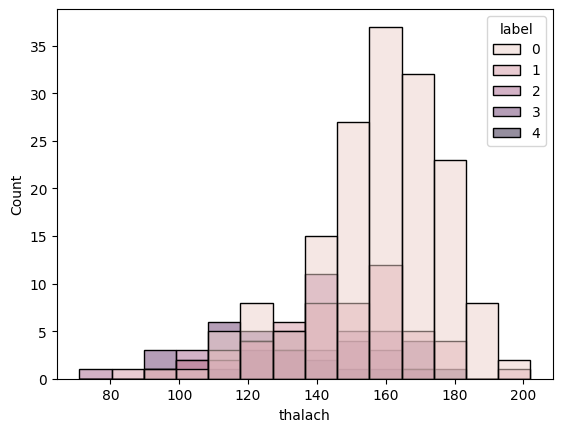

In [2972]:
sns.histplot(data=X,x=X['thalach'],hue='label') #maximum heart rate

<Axes: xlabel='trestbps', ylabel='Count'>

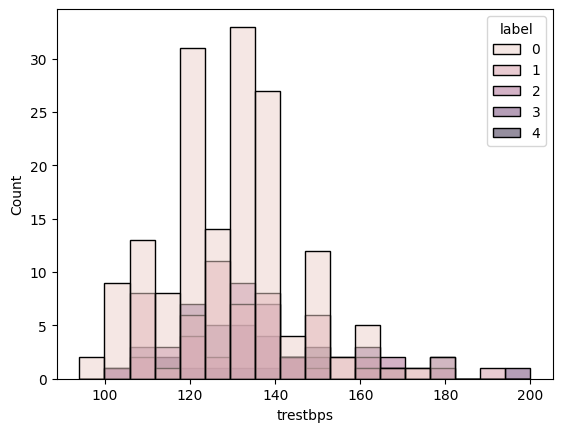

In [2973]:
sns.histplot(data=X,x=X['trestbps'],hue='label') #blood pressure

# Preprocessing: Identifying Missing Values

Here, we attempt to address the missing values in the dataset.

In [2984]:
X['ca'].isnull().sum().sum()

np.int64(4)

In [2985]:
X['thal'].isnull().sum().sum()

np.int64(2)

In [2986]:
X['ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [2987]:
X['thal'].unique()

array([ 6.,  3.,  7., nan])

In [2988]:
df = X

In [2989]:
len(df)

303

In [2990]:
X.head(303)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


# Preprocessing: KNN 1 - ca
KNN Model with K=1

Now, we will be preprocessing our data by using a K-Nearest-Neighbors (KNN) approach. We'll make two of them: one for ca and one for thal.

In [2991]:
df_ca = df.drop('thal', axis=1)

In [2992]:
df_thal = df.drop('ca', axis=1)

In [2993]:
from sklearn.model_selection import train_test_split

In [2994]:
missing_values_mask_ca = df_ca.isnull().any(axis=1)

df_missing = df_ca[missing_values_mask_ca]
df_no_missing = df_ca[~missing_values_mask_ca]
xtrain, ytrain, xtest, ytest = df_no_missing.drop('ca',axis=1), df_no_missing['ca'], df_missing.drop('ca',axis=1), df_missing['ca']
xtrain, xvalidation, ytrain, yvalidation = train_test_split(xtrain, ytrain, test_size=0.1, random_state=42)

In [2995]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2996]:
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain, ytrain)
  predictions = knn.predict(xvalidation)
  # Print the score on the testing data
  print("KNN Testing Set Accuracy:")
  print(accuracy_score(yvalidation, predictions)*100)
  print(knn.predict(xtest))

KNN Testing Set Accuracy:
56.666666666666664
[2. 0. 1. 0.]
KNN Testing Set Accuracy:
53.333333333333336
[0. 0. 1. 0.]
KNN Testing Set Accuracy:
63.33333333333333
[0. 0. 3. 0.]
KNN Testing Set Accuracy:
60.0
[0. 0. 3. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 3. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
70.0
[0. 0. 2. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 2. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 2. 0.]
KNN Testing Set Accuracy:
60.0
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
60.0
[0. 0. 2. 0.]
KNN Testing Set Accuracy:
63.33333333333333
[0. 0. 2. 0.]
KNN Testing Set Accuracy:
63.33333333333333
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
63.33333333333333
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
60.0
[0. 0. 0. 0.]
KNN Testing Set Acc

In [2997]:
df.loc[166, 'ca'] = 0
df.loc[192, 'ca'] = 0
df.loc[287, 'ca'] = 2
df.loc[302, 'ca'] = 0

# Preprocessing: KNN 2 - thal
KNN Model with K=1

In [2998]:
missing_values_mask_thal = df_thal.isnull().any(axis=1)

df_missing = df_thal[missing_values_mask_thal]
df_no_missing = df_thal[~missing_values_mask_thal]
xtrain, ytrain, xtest, ytest = df_no_missing.drop('thal',axis=1), df_no_missing['thal'], df_missing.drop('thal',axis=1), df_missing['thal']
xtrain, xvalidation, ytrain, yvalidation = train_test_split(xtrain, ytrain, test_size=0.1)

In [2999]:
xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label
87,53,0,3,128,216,0,2,115,0,0.0,1,0
266,52,1,4,128,204,1,0,156,1,1.0,2,2


Regression would be better in this case because of the 3-6-7 split in classes, with 6 and 7 being more extreme

In [3000]:
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain, ytrain)
  predictions = knn.predict(xvalidation)
  # Print the score on the testing data
  print("KNN Testing Set Accuracy:")
  print(accuracy_score(yvalidation, predictions)*100)
  print(knn.predict(xtest))

KNN Testing Set Accuracy:
48.38709677419355
[3. 3.]
KNN Testing Set Accuracy:
48.38709677419355
[3. 3.]
KNN Testing Set Accuracy:
51.61290322580645
[7. 3.]
KNN Testing Set Accuracy:
51.61290322580645
[7. 3.]
KNN Testing Set Accuracy:
48.38709677419355
[7. 3.]
KNN Testing Set Accuracy:
45.16129032258064
[7. 3.]
KNN Testing Set Accuracy:
41.935483870967744
[7. 3.]
KNN Testing Set Accuracy:
41.935483870967744
[7. 3.]
KNN Testing Set Accuracy:
45.16129032258064
[7. 3.]
KNN Testing Set Accuracy:
45.16129032258064
[7. 3.]
KNN Testing Set Accuracy:
51.61290322580645
[7. 3.]
KNN Testing Set Accuracy:
54.83870967741935
[7. 3.]
KNN Testing Set Accuracy:
51.61290322580645
[7. 3.]
KNN Testing Set Accuracy:
51.61290322580645
[7. 3.]
KNN Testing Set Accuracy:
51.61290322580645
[7. 3.]
KNN Testing Set Accuracy:
54.83870967741935
[7. 3.]
KNN Testing Set Accuracy:
51.61290322580645
[7. 3.]
KNN Testing Set Accuracy:
51.61290322580645
[7. 3.]
KNN Testing Set Accuracy:
51.61290322580645
[7. 3.]
KNN Testin

In [3001]:
df.loc[87, 'thal'] = 7
df.loc[266, 'thal'] = 3

# Preprocessing: Normalization

In [3002]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3003]:
df['cp']/=4

In [3004]:
df['trestbps'] = (df['trestbps'] - df['trestbps'].mean(axis=0))/df['trestbps'].std()

In [3005]:
df['chol'] = (df['chol'] - df['chol'].mean(axis=0))/df['chol'].std()

In [3006]:
df['restecg']/=2

In [3007]:
df['thalach'] = (df['thalach'] - df['thalach'].mean(axis=0))/df['thalach'].std()

In [3008]:
df['oldpeak'] = (df['oldpeak'] - df['oldpeak'].mean(axis=0))/df['oldpeak'].std()

In [3009]:
df['ca']/=3

In [3010]:
df['thal']/=7

In [3011]:
df['age'] = (df['age'] - df['age'].mean(axis=0))/df['age'].std()

In [3012]:
df['slope']/=3

In [3013]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0.947160,1,0.25,0.756274,-0.264463,1,1.0,0.017169,0,1.085542,1.000000,0.000000,0.857143,0
1,1.389703,1,1.00,1.608559,0.759159,0,1.0,-1.818896,1,0.396526,0.666667,1.000000,0.428571,2
2,1.389703,1,1.00,-0.664201,-0.341717,0,1.0,-0.900864,1,1.343924,0.666667,0.666667,1.000000,1
3,-1.929372,1,0.75,-0.096011,0.063869,0,0.0,1.634655,0,2.119067,1.000000,0.000000,0.428571,0
4,-1.486829,0,0.50,-0.096011,-0.824558,0,1.0,0.978917,0,0.310399,0.333333,0.000000,0.428571,0


# Resampling Code: SMOTE

In [3014]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X, y = df.drop('label',axis=1), df['label']
X_res, y_res = sm.fit_resample(X, y.ravel())

/var/folders/rn/ry_5bfb11bvcnryvb2p6pfrr0000gn/T/ipykernel_25811/4284888615.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_res, y_res = sm.fit_resample(X, y.ravel())


In [3015]:
df_upsampled_multi = X_res
df_upsampled_multi['label'] = y_res
df_upsampled_multi.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0.947160,1,0.25,0.756274,-0.264463,1,1.0,0.017169,0,1.085542,1.000000,0.000000,0.857143,0
1,1.389703,1,1.00,1.608559,0.759159,0,1.0,-1.818896,1,0.396526,0.666667,1.000000,0.428571,2
2,1.389703,1,1.00,-0.664201,-0.341717,0,1.0,-0.900864,1,1.343924,0.666667,0.666667,1.000000,1
3,-1.929372,1,0.75,-0.096011,0.063869,0,0.0,1.634655,0,2.119067,1.000000,0.000000,0.428571,0
4,-1.486829,0,0.50,-0.096011,-0.824558,0,1.0,0.978917,0,0.310399,0.333333,0.000000,0.428571,0


In [3016]:
X_res.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
815    False
816    False
817    False
818    False
819    False
Length: 820, dtype: bool

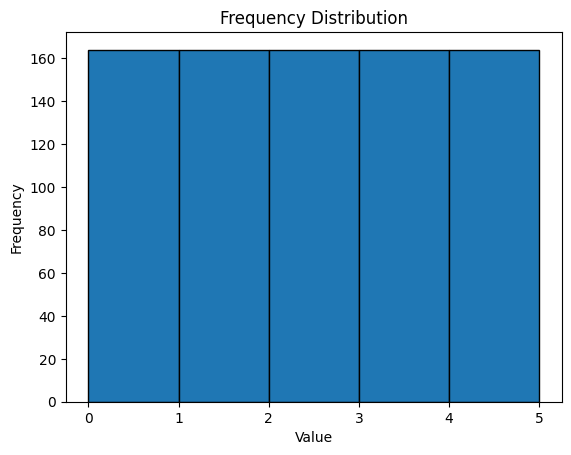

In [3017]:
plt.hist(y_res, bins=range(0, 6), edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')
plt.show()

# Aggregate Data

In [3018]:
confusion_lr = np.array([])
confusion_rf = np.array([])
confusion_knn = np.array([])
confusion_mlp = np.array([])
confusion_svc = np.array([])
confusion_dt = np.array([])
confusion_custom = np.array([])

# Attribute Removal: High Multicollinearity

In [3019]:
from sklearn.model_selection import StratifiedKFold, KFold

In [3020]:
X, y = df_upsampled_multi.drop('label',axis=1), df_upsampled_multi['label']

Variance Inflation Factor (VIF) for each feature:
     Feature        VIF
0        age   1.558688
1        sex   3.929000
2         cp  18.221128
3   trestbps   1.320728
4       chol   1.196935
5        fbs   1.163490
6    restecg   3.420619
7    thalach   1.573274
8      exang   1.929052
9    oldpeak   1.731566
10     slope  15.456303
11        ca   3.479767
12      thal  14.934915


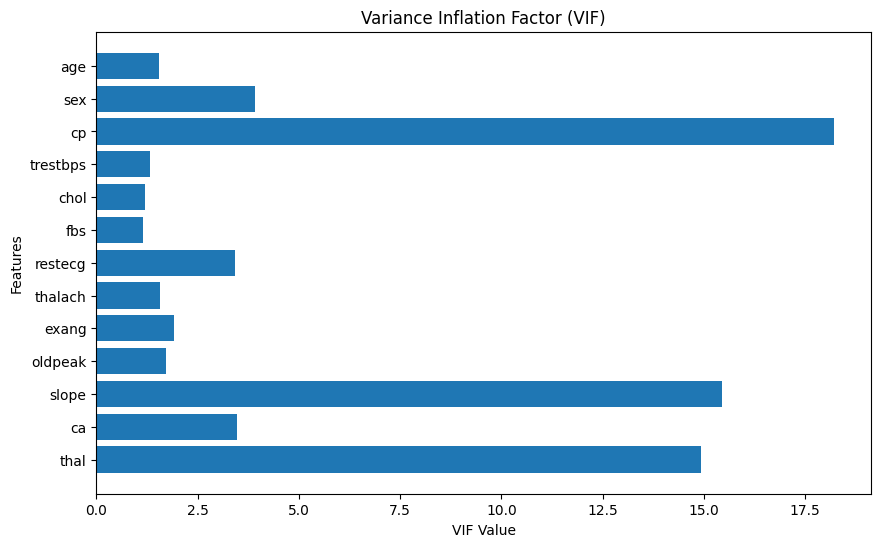

In [3021]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame({
    'Feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
vif_data = vif_data[vif_data['Feature'] != 'const']

print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'])
plt.gca().invert_yaxis()
plt.title('Variance Inflation Factor (VIF)')
plt.xlabel('VIF Value')
plt.ylabel('Features')
plt.show()

Variance Inflation Factor (VIF) for each feature:
     Feature       VIF
0        age  1.531875
1        sex  3.470348
2         cp  7.166273
3   trestbps  1.250213
4       chol  1.195083
5        fbs  1.136782
6    restecg  3.331722
7    thalach  1.559500
8      exang  1.923097
9    oldpeak  1.398324
10        ca  3.367828


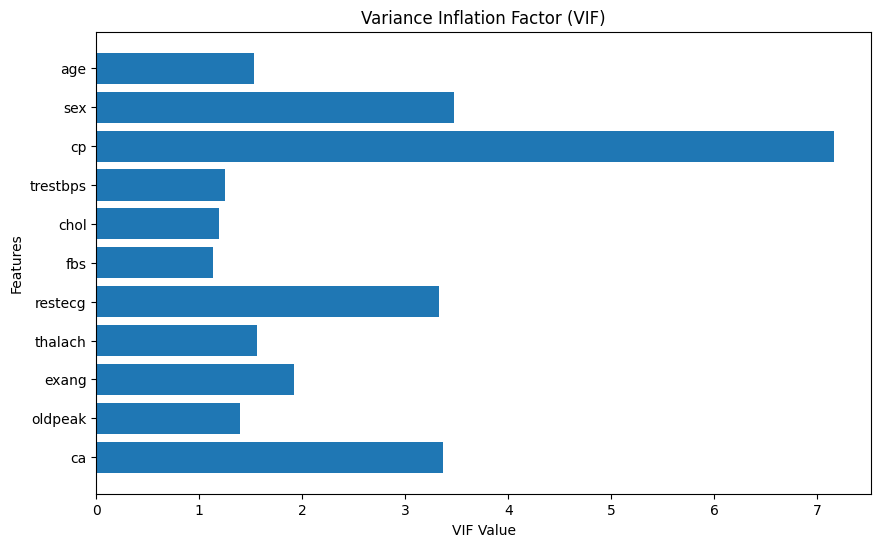

In [3022]:
x2 = X.drop("thal", axis=1)
x2 = x2.drop("slope", axis=1)

vif_data = pd.DataFrame({
    'Feature': x2.columns,
    'VIF': [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
})
vif_data = vif_data[vif_data['Feature'] != 'const']

print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'])
plt.gca().invert_yaxis()
plt.title('Variance Inflation Factor (VIF)')
plt.xlabel('VIF Value')
plt.ylabel('Features')
plt.show()

In [3023]:
pd.concat([x2, y], axis=1).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,label
0,0.947160,1,0.25,0.756274,-0.264463,1,1.0,0.017169,0,1.085542,0.000000,0
1,1.389703,1,1.00,1.608559,0.759159,0,1.0,-1.818896,1,0.396526,1.000000,2
2,1.389703,1,1.00,-0.664201,-0.341717,0,1.0,-0.900864,1,1.343924,0.666667,1
3,-1.929372,1,0.75,-0.096011,0.063869,0,0.0,1.634655,0,2.119067,0.000000,0
4,-1.486829,0,0.50,-0.096011,-0.824558,0,1.0,0.978917,0,0.310399,0.000000,0


# K-Fold Cross-Validation Splits

In [3076]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [3077]:
global X_train, X_test, y_train, y_test
for fold, (train_index, test_index) in enumerate(kfold.split(X,y)):
    if fold==4:
        X_train, X_test = x2.iloc[train_index], x2.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

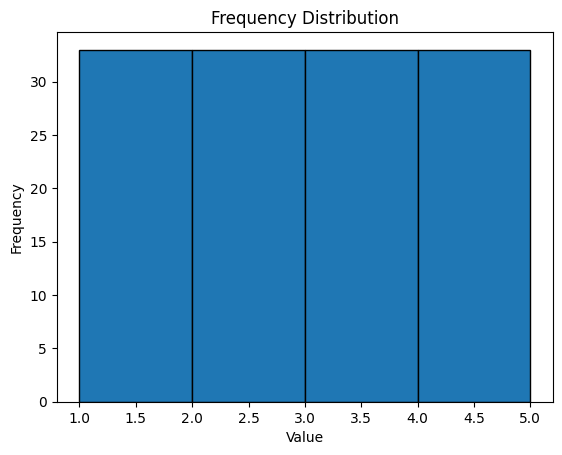

In [3078]:
plt.hist(y_test, bins=range(1, 6), edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')
plt.show()

# Model 1: Logistic Regression
For reference, our Pandas DataFrame is now called 'df.'

In [2746]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

In [2747]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [2748]:
y_pred_lr = model_lr.predict(X_test)

In [2749]:
log_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {log_accuracy}")

Accuracy: 0.5365853658536586


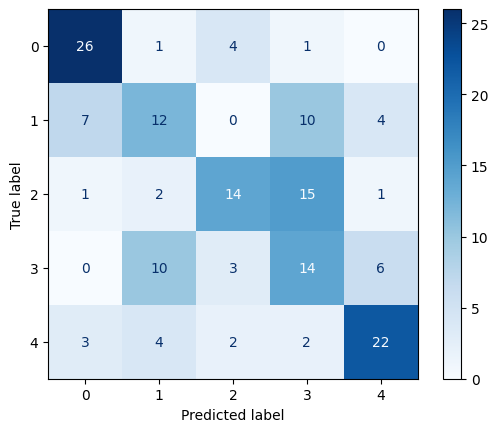

In [2750]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=model_lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [2751]:
cm_lr

array([[26,  1,  4,  1,  0],
       [ 7, 12,  0, 10,  4],
       [ 1,  2, 14, 15,  1],
       [ 0, 10,  3, 14,  6],
       [ 3,  4,  2,  2, 22]])

Other models to implement:

Classification - Logistic Regression, K-Nearest-Neighbors, MLP, Random Forest Classifier

Regression - Linear Regression, Random Forest Regressor

In [2752]:
model_lr.coef_[0]

array([ 0.05041456, -1.04043176, -2.3206013 , -0.32181597, -0.19365067,
        0.60712066, -0.6497222 ,  0.5981102 , -0.09830915, -0.6413809 ,
       -3.2328666 ])

In [2753]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred_lr, average='macro')
recall = recall_score(y_test, y_pred_lr, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")


Precision for Zero vs Non-Zero: 0.5450382916649783
Recall for Zero vs Non-Zero: 0.5382575757575758


In [2754]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_probs = model_lr.predict_proba(X_test)
auc_scores = []
for i, class_label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

macro_auc = np.mean(auc_scores)
print(f"Macro-Average AUC: {macro_auc}")

Macro-Average AUC: 0.8275145298403885


<Axes: ylabel='Feature'>

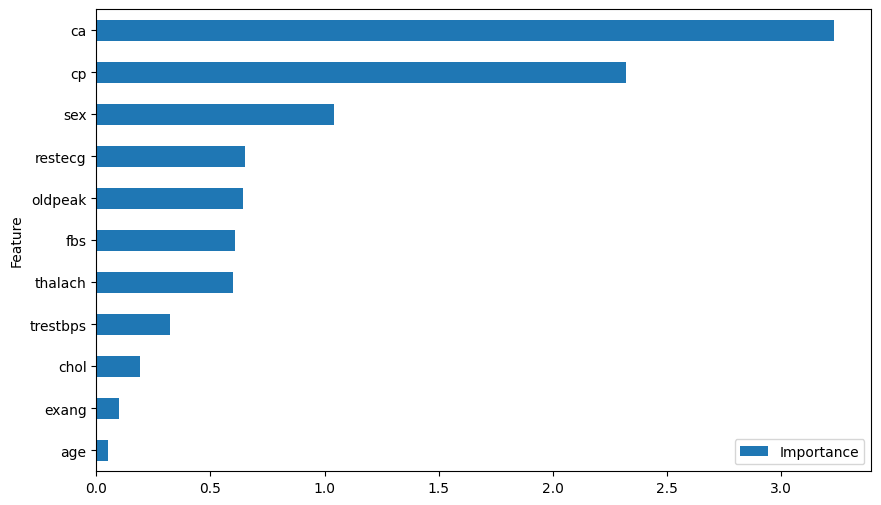

In [2755]:
coefficients = model_lr.coef_[0]

feature_importance = pd.DataFrame({'Feature': x2.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)) #The weights used in the model by the logistic model

In [2756]:
if len(confusion_lr)==0:
    confusion_lr = cm_lr
else:
    confusion_lr+=cm_lr

# Model 2: Random Forest Classifier

In [2757]:
from sklearn.ensemble import RandomForestClassifier

In [2758]:
model_rf = RandomForestClassifier(n_estimators=128, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy score: {rf_accuracy}, N estimators: {128}")

Accuracy score: 0.8963414634146342, N estimators: 128


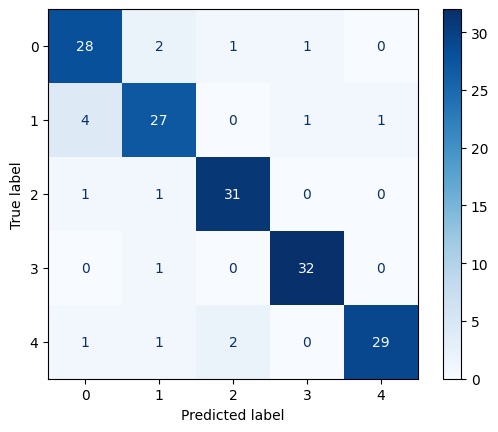

In [2759]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [2760]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.8973774509803922
Recall for Zero vs Non-Zero: 0.8962121212121212


<Axes: >

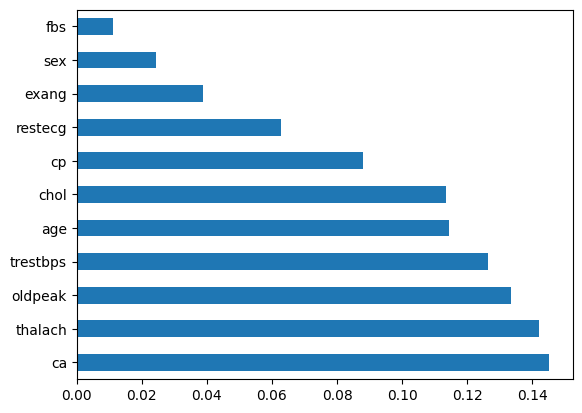

In [2761]:
(pd.Series(model_rf.feature_importances_, index=X_train.columns)
   .nlargest(13)
   .plot(kind='barh'))

In [2762]:
for name, importance in zip(X_train, model_rf.feature_importances_):
    print(name,importance)

age 0.1144836197550212
sex 0.024400769394127348
cp 0.08808954348833521
trestbps 0.1264171206200349
chol 0.11352049701962123
fbs 0.01111631606639347
restecg 0.06274094329675627
thalach 0.1419696310003173
exang 0.038677547304693215
oldpeak 0.1334296770324613
ca 0.14515433502223854


In [2763]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_probs = model_rf.predict_proba(X_test)
auc_scores = []
for i, class_label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

macro_auc = np.mean(auc_scores)
print(f"Macro-Average AUC: {macro_auc}")

Macro-Average AUC: 0.9870144069511915


In [2764]:
if len(confusion_rf)==0:
    confusion_rf = cm_rf
else:
    confusion_rf+=cm_rf

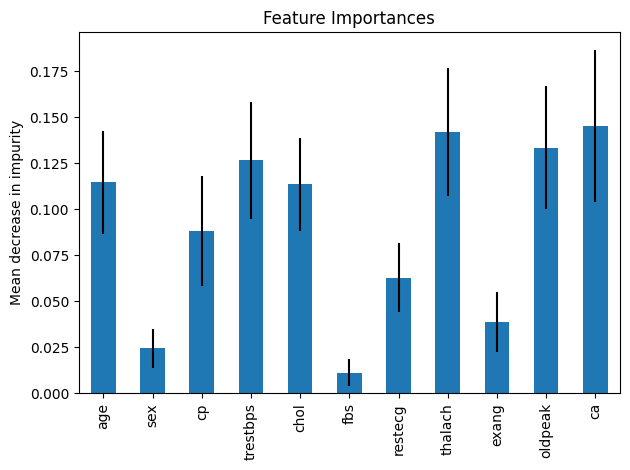

In [2765]:
feature_names = [f"{feature}" for i,feature in enumerate(X_train.columns)]
importances = model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Model 3: K-Nearest-Neighbors (KNN) Classifier

In [2766]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy score: {knn_accuracy}, K: {1}")

Accuracy score: 0.9024390243902439, K: 1


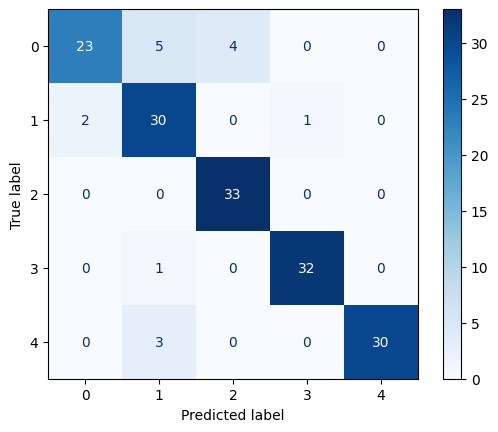

In [2767]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=model_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [2768]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.9101639261639262
Recall for Zero vs Non-Zero: 0.9013257575757576


In [2769]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_probs = model_knn.predict_proba(X_test)
auc_scores = []
for i, class_label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

macro_auc = np.mean(auc_scores)
print(f"Macro-Average AUC: {macro_auc}")

Macro-Average AUC: 0.938460704371964


In [2770]:
if len(confusion_knn)==0:
    confusion_knn = cm_knn
else:
    confusion_knn+=cm_knn

# Model 4: Multilayer Perceptron (MLP) Classifier

In [2771]:
from sklearn.neural_network import MLPClassifier

In [2772]:
model_mlp = MLPClassifier(random_state=42)
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy score: {mlp_accuracy}")

Accuracy score: 0.7926829268292683


/opt/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


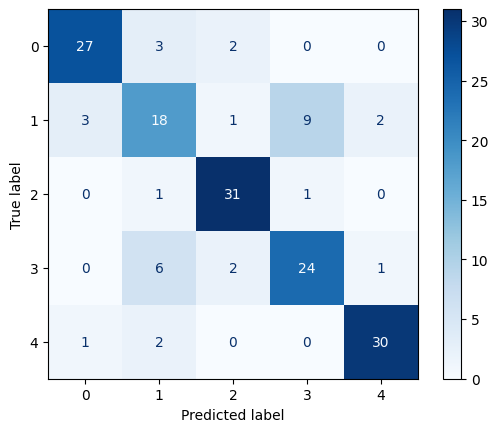

In [2773]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=model_mlp.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [2774]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred_mlp, average='macro')
recall = recall_score(y_test, y_pred_mlp, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.7894104230157362
Recall for Zero vs Non-Zero: 0.7929924242424242


In [2775]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_probs = model_mlp.predict_proba(X_test)
auc_scores = []
for i, class_label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

macro_auc = np.mean(auc_scores)
print(f"Macro-Average AUC: {macro_auc}")

Macro-Average AUC: 0.9497451856349757


In [2776]:
if len(confusion_mlp)==0:
    confusion_mlp = cm_mlp
else:
    confusion_mlp+=cm_mlp

# Model 5: Support Vector Machines (SVM) Classifier

In [2777]:
from sklearn.svm import SVC

In [2778]:
model_svc = SVC(random_state=42)
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy score: {svc_accuracy}")

Accuracy score: 0.7865853658536586


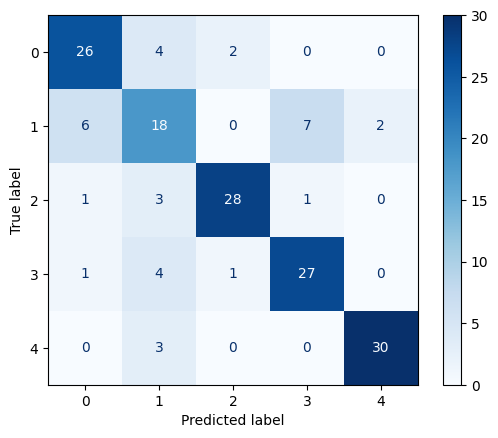

In [2779]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=model_svc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [2780]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred_svc, average='macro')
recall = recall_score(y_test, y_pred_svc, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.7878720520466251
Recall for Zero vs Non-Zero: 0.7867424242424244


In [2781]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_scores = model_svc.decision_function(X_test)
auc_scores = []
for i, class_label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

macro_auc = np.mean(auc_scores)
print(f"Macro-Average AUC: {macro_auc}")

Macro-Average AUC: 0.9378636074485313


In [2782]:
if len(confusion_svc)==0:
    confusion_svc = cm_svc
else:
    confusion_svc+=cm_svc

# Model 6: Decision Tree Classifier

In [2783]:
from sklearn.tree import DecisionTreeClassifier

In [2784]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy score: {dt_accuracy}")

Accuracy score: 0.7012195121951219


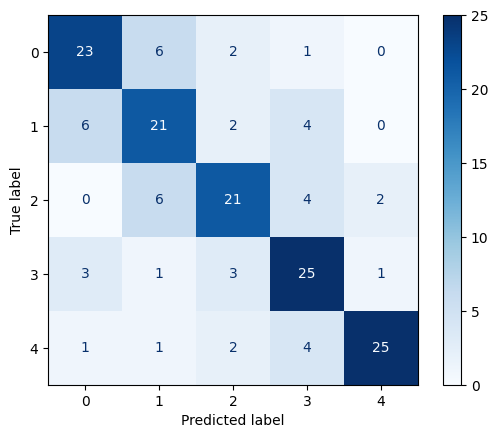

In [2785]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=model_dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [2786]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred_dt, average='macro')
recall = recall_score(y_test, y_pred_dt, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.709544315333789
Recall for Zero vs Non-Zero: 0.7013257575757577


In [2787]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_probs = model_dt.predict_proba(X_test)
auc_scores = []
for i, class_label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

macro_auc = np.mean(auc_scores)
print(f"Macro-Average AUC: {macro_auc}")

Macro-Average AUC: 0.8133161288457089


In [2788]:
if len(confusion_dt)==0:
    confusion_dt = cm_dt
else:
    confusion_dt+=cm_dt

# Custom TensorFlow Model - Multi-class Classification

In [2789]:
from keras.models import Sequential, load_model
from keras.layers import Dense, InputLayer, Activation, Conv2D, MaxPooling2D, Add
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.losses import SparseCategoricalCrossentropy
import keras

In [2790]:
np.random.seed(42)

In [2791]:
X_trainc, X_val, y_trainc, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=42)

In [2792]:
X.shape

(820, 13)

In [2793]:
from keras.callbacks import ModelCheckpoint, Callback

In [2794]:
class SaveBestModel(Callback):
  def __init__(self, save_path):
    super(SaveBestModel, self).__init__()
    self.save_path = save_path
    self.best_acc_sum = -np.inf
    self.best_epoch = -1
  def on_epoch_end(self, epoch, logs=None):
    current_val_accuracy = logs.get('val_accuracy')
    current_accuracy = logs.get('accuracy')
    if current_val_accuracy+current_accuracy>=self.best_acc_sum and epoch>20 and current_accuracy!=1:
      self.best_acc_sum = current_val_accuracy+current_accuracy
      self.best_epoch = epoch
      self.model.save(self.save_path)
      print(f"\nEpoch {epoch+1}: val_accuracy improved to {current_val_accuracy}, saving model to {self.save_path}")

In [2795]:
callbacks_list = [
      #ModelCheckpoint(filepath='checkpoint_path_multi.keras', monitor='val_loss', save_best_only=True),
      SaveBestModel(save_path='checkpoint_custom_callback.keras')
]

In [2796]:
from keras import Input, Model

In [2797]:
inLayer = Input(shape=(11,))
x = Dense(1024, activation='relu')(inLayer)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(11, activation='relu')(x)
skip = Add()([inLayer, x])
x = Dense(512, activation='relu')(skip)
x = Dense(512, activation='relu')(x)
x = Dense(11, activation='relu')(x)
skip = Add()([inLayer, x])
x = Dense(512, activation='relu')(skip)
outLayer = Dense(5, activation='softmax')(x)
model = Model(inputs=inLayer, outputs=outLayer)

In [2798]:
model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_170 (Dense)   │ (None, 1024)      │     12,288 │ input_layer_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_171 (Dense)   │ (None, 512)       │    524,800 │ dense_170[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_172 (Dense)   │ (None, 512)       │    262,656 │ dense_171[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_173 (Dense)   │ (None, 11)        │      5,643 │ dense_172[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_38 (Add)        │ (None, 11)        │          0 │ input_layer_20[0… │
│                     │                   │            │ dense_173[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_174 (Dense)   │ (None, 512)       │      6,144 │ add_38[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_175 (Dense)   │ (None, 512)       │    262,656 │ dense_174[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_176 (Dense)   │ (None, 11)        │      5,643 │ dense_175[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_39 (Add)        │ (None, 11)        │          0 │ input_layer_20[0… │
│                     │                   │            │ dense_176[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_177 (Dense)   │ (None, 512)       │      6,144 │ add_39[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_178 (Dense)   │ (None, 5)         │      2,565 │ dense_177[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,088,539 (4.15 MB)

 Trainable params: 1,088,539 (4.15 MB)

 Non-trainable params: 0 (0.00 B)

In [2799]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [2800]:
history = model.fit(x=X_trainc, y=y_trainc, batch_size=16, epochs=400, shuffle=True, verbose=1, validation_data=(X_val, y_val), callbacks=callbacks_list)

Epoch 1/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1330 - loss: 1.6296 - val_accuracy: 0.3030 - val_loss: 1.6215
Epoch 2/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1960 - loss: 1.6171 - val_accuracy: 0.3030 - val_loss: 1.6144
Epoch 3/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2035 - loss: 1.6162 - val_accuracy: 0.2727 - val_loss: 1.6084
Epoch 4/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2045 - loss: 1.6076 - val_accuracy: 0.2727 - val_loss: 1.6020
Epoch 5/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2229 - loss: 1.6055 - val_accuracy: 0.3636 - val_loss: 1.5948
Epoch 6/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2230 - loss: 1.5935 - val_accuracy: 0.3939 - val_loss: 1.5879
Epoch 7/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2647 - loss: 1.5884 - val_accuracy: 0.4242 - val_loss: 1.5793
Epoch 8/400
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2808 - loss: 1.5731 - val_accuracy: 0.4545 - v

In [2801]:
def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.2, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')
    ax.legend(loc = 7)
    ax.set_ylim([0, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')

    plt.show()
    print(f"The best epoch is: {best_epoch+1}")

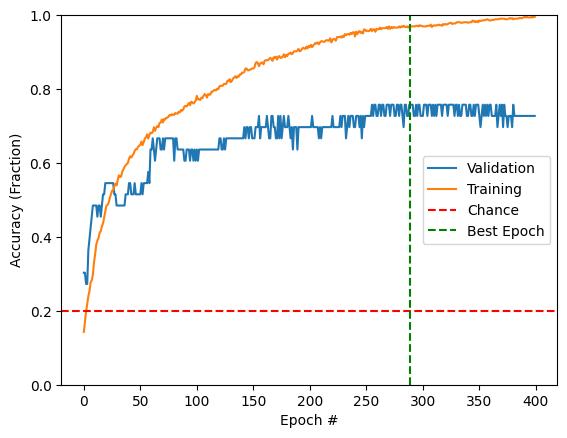

The best epoch is: 290.0


In [2802]:
plot_acc(history)

In [2803]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 0.7944 


[0.6425623297691345, 0.8597561120986938]

In [2804]:
cp_model = load_model("checkpoint_custom_callback.keras")

In [2805]:
cp_model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.8216 - loss: 0.7451


[0.6001399159431458, 0.8597561120986938]

In [2806]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


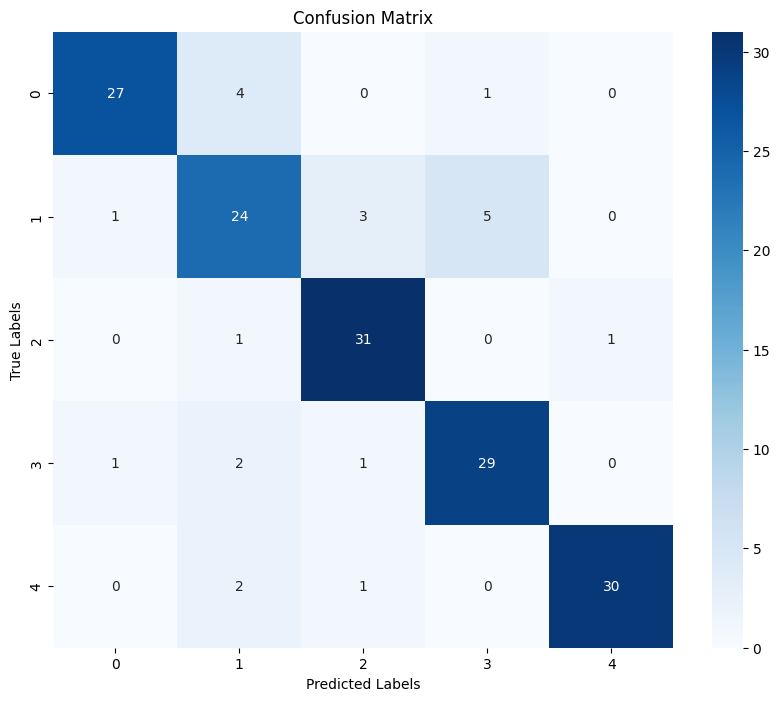

In [2807]:
y_pred_probs = cp_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Assuming y_test is in sparse format (not one-hot encoded)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [2808]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.8631463370395519
Recall for Zero vs Non-Zero: 0.859659090909091


In [2809]:
y_test_binarized.shape

(164, 5)

In [2810]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_probs = model.predict(X_test)
auc_scores = []
for i, class_label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

macro_auc = np.mean(auc_scores)
print(f"Macro-Average AUC: {macro_auc}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Macro-Average AUC: 0.9653466921119593


In [2811]:
if len(confusion_custom)==0:
    confusion_custom = conf_matrix
else:
    confusion_custom+=conf_matrix

# Wearable Tech Implementation

In [3079]:
df_wearable = df_upsampled_multi.copy()
df_wearable

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0.947160,1,0.25,0.756274,-0.264463,1,1.000000,0.017169,0,1.085542,1.000000,0.000000,0.857143,0
1,1.389703,1,1.00,1.608559,0.759159,0,1.000000,-1.818896,1,0.396526,0.666667,1.000000,0.428571,2
2,1.389703,1,1.00,-0.664201,-0.341717,0,1.000000,-0.900864,1,1.343924,0.666667,0.666667,1.000000,1
3,-1.929372,1,0.75,-0.096011,0.063869,0,0.000000,1.634655,0,2.119067,1.000000,0.000000,0.428571,0
4,-1.486829,0,0.50,-0.096011,-0.824558,0,1.000000,0.978917,0,0.310399,0.333333,0.000000,0.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,0.728225,1,1.00,1.239865,-0.037187,0,1.000000,-0.918544,0,0.460644,0.666667,0.808518,0.917936,4
816,1.491315,0,1.00,0.874546,-0.993900,0,0.416313,-1.275921,0,0.770230,0.861229,0.416313,1.000000,4
817,0.873497,0,1.00,0.767986,2.867212,0,0.933418,0.110534,0,2.595578,0.711054,1.000000,0.980977,4
818,0.875771,0,1.00,1.322183,-0.010256,0,1.000000,-1.412052,0,-0.034110,0.666667,1.000000,1.000000,4


In [3080]:
df_wearable = df_wearable.drop("ca",axis=1)

In [3081]:
df_wearable = df_wearable.drop("thal",axis=1)

In [3082]:
df_wearable = df_wearable.drop("slope",axis=1)

In [3083]:
df_wearable = df_wearable.drop("fbs",axis=1)

In [3084]:
df_wearable = df_wearable.drop("chol",axis=1)

In [3085]:
df_wearable = df_wearable.drop("exang",axis=1)

In [3086]:
df_wearable = df_wearable.drop("oldpeak",axis=1)

In [3087]:
df_wearable

,age,sex,cp,trestbps,restecg,thalach,label
0,0.947160,1,0.25,0.756274,1.000000,0.017169,0
1,1.389703,1,1.00,1.608559,1.000000,-1.818896,2
2,1.389703,1,1.00,-0.664201,1.000000,-0.900864,1
3,-1.929372,1,0.75,-0.096011,0.000000,1.634655,0
4,-1.486829,0,0.50,-0.096011,1.000000,0.978917,0
...,...,...,...,...,...,...,...
815,0.728225,1,1.00,1.239865,1.000000,-0.918544,4
816,1.491315,0,1.00,0.874546,0.416313,-1.275921,4
817,0.873497,0,1.00,0.767986,0.933418,0.110534,4
818,0.875771,0,1.00,1.322183,1.000000,-1.412052,4


In [3088]:
knn_wearable = KNeighborsClassifier(n_neighbors=1)

In [3089]:
rf_wearable = RandomForestClassifier(n_estimators=128, random_state=42)

In [3090]:
X_wearable, y_wearable = df_wearable.drop("label",axis=1), df_wearable["label"]

In [3091]:
X_train, X_test, y_train, y_test = train_test_split(X_wearable, y_wearable, test_size=0.2)#, random_state=42)

In [3103]:
rf_wearable = RandomForestClassifier(n_estimators=128)
rf_wearable.fit(X_train, y_train)
y_pred = rf_wearable.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {rf_accuracy}, N estimators: {128}")

Accuracy score: 0.75, N estimators: 128


In [3093]:
knn_wearable = KNeighborsClassifier(n_neighbors=1)
knn_wearable.fit(X_train, y_train)
y_pred = knn_wearable.predict(X_test)
knn_wearable = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {knn_wearable}, K: {1}")

Accuracy score: 0.7621951219512195, K: 1


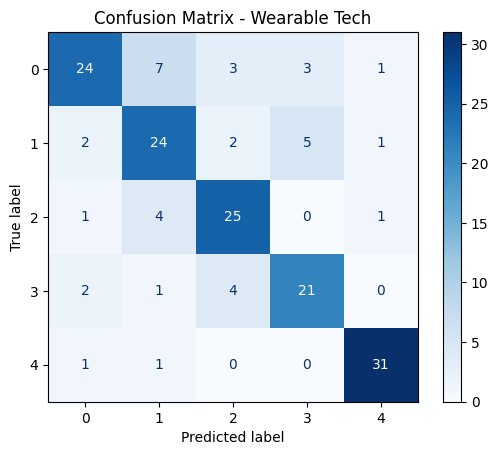

In [3094]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_wearable.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Wearable Tech")
plt.show()

In [3095]:
feature_importances = rf_wearable.feature_importances_
feature_names = [f"{feature}" for i,feature in enumerate(X_wearable.columns)]

Variance Inflation Factor (VIF) for each feature:
    Feature       VIF
0       age  1.316427
1       sex  3.218387
2        cp  5.049925
3  trestbps  1.201481
4   restecg  3.221615
5   thalach  1.352017


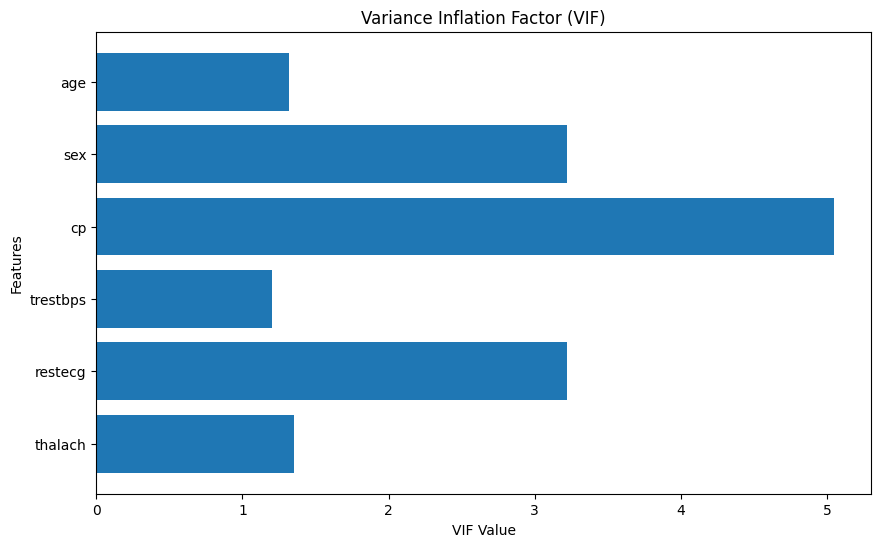

In [3096]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame({
    'Feature': X_wearable.columns,
    'VIF': [variance_inflation_factor(X_wearable.values, i) for i in range(X_wearable.shape[1])]
})
vif_data = vif_data[vif_data['Feature'] != 'const']

print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'])
plt.gca().invert_yaxis()
plt.title('Variance Inflation Factor (VIF)')
plt.xlabel('VIF Value')
plt.ylabel('Features')
plt.show()

In [3097]:
from scipy.stats import pearsonr

In [3098]:
correlations = []
names = []

for column in X_wearable.columns:
    if column=="label": continue
    corr, _ = pearsonr(df[column],df['label'])
    names.append(column)
    correlations.append(corr)

corrdata = pd.DataFrame({
    "Feature": names,
    "Pearson": correlations,
    "Gini": feature_importances
})

corrdata

,Feature,Pearson,Gini
0,age,0.222853,0.222893
1,sex,0.224469,0.045801
2,cp,0.407075,0.150653
3,trestbps,0.157754,0.225116
4,restecg,0.183696,0.109504
5,thalach,-0.415040,0.246032


/var/folders/rn/ry_5bfb11bvcnryvb2p6pfrr0000gn/T/ipykernel_25811/2866282503.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0]+names)


[Text(-1.0, 0, '0'),
 Text(0.0, 0, 'age'),
 Text(1.0, 0, 'sex'),
 Text(2.0, 0, 'cp'),
 Text(3.0, 0, 'trestbps'),
 Text(4.0, 0, 'restecg'),
 Text(5.0, 0, 'thalach'),
 Text(6.0, 0, '')]

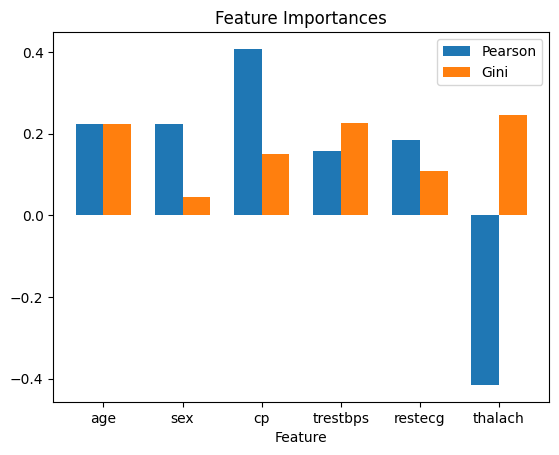

In [3099]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(X_wearable.columns)) - 0.35/2, correlations, 0.35, label='Pearson')
rects2 = ax.bar(np.arange(len(X_wearable.columns)) + 0.35/2, feature_importances, 0.35, label='Gini')
plt.xlabel("Feature")
plt.title("Feature Importances")
ax.legend(["Pearson", "Gini"])
ax.set_xticklabels([0]+names)

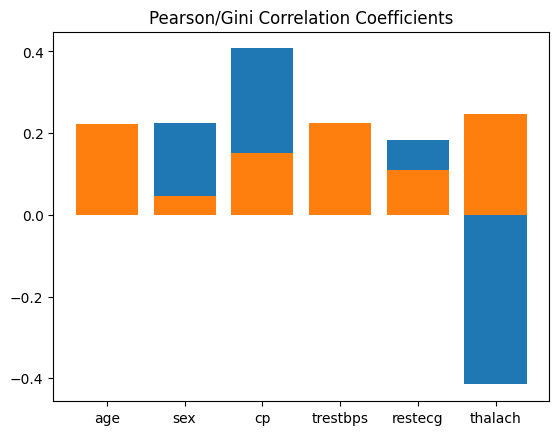

In [3100]:
X_axis = np.arange(len(X_wearable)) 
plt.bar(names, correlations, label = "Pearson")
plt.bar(names, feature_importances, label = "Gini")
plt.title("Pearson/Gini Correlation Coefficients")
plt.show()

In [3101]:
import shap

explainer = shap.Explainer(rf_wearable, X_wearable)
shap_values = explainer(X_wearable)

plt.figure(figsize=(10, 6))
plt.barh(X_wearable.columns, shap_values.abs.mean(axis=0).values, color='skyblue')
plt.gca().invert_yaxis()
plt.title('SHAP Feature Importance')
plt.xlabel('Mean Absolute SHAP Value')
plt.show()

ImportError: Numba needs NumPy 2.1 or less. Got NumPy 2.2.

In [777]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.707586115527292
Recall for Zero vs Non-Zero: 0.705930735930736


In [778]:
df_wearable.to_csv("wearable.csv",index=False)

# Aggregate Confusion Matrices

In [2812]:
cm_lst = [confusion_lr,
confusion_rf,
confusion_knn,
confusion_mlp,
confusion_svc,
confusion_dt,
confusion_custom]

In [2813]:
cm_lst

[array([[126,  21,  11,   4,   2],
        [ 49,  60,  12,  34,   9],
        [  3,  29,  53,  44,  35],
        [  8,  29,  30,  73,  24],
        [  6,  12,   8,  14, 124]]),
 array([[138,  19,   3,   3,   1],
        [ 29, 118,   5,   8,   4],
        [  4,   5, 145,   5,   5],
        [  2,   2,   7, 151,   2],
        [  1,   2,   3,   0, 158]]),
 array([[102,  26,  18,  11,   7],
        [  7, 148,   2,   4,   3],
        [  1,   0, 159,   0,   4],
        [  2,   2,   1, 158,   1],
        [  0,   3,   0,   0, 161]]),
 array([[121,  25,  11,   4,   3],
        [ 26,  90,  12,  26,  10],
        [  4,   8, 131,  13,   8],
        [  5,  19,   6, 130,   4],
        [  1,   2,   0,   1, 160]]),
 array([[122,  24,  10,   6,   2],
        [ 32,  89,   8,  26,   9],
        [  5,  22, 123,  11,   3],
        [  8,  10,   8, 135,   3],
        [  0,   4,   1,   0, 159]]),
 array([[111,  32,  10,   8,   3],
        [ 30, 101,   9,  15,   9],
        [  7,  20, 115,  13,   9],
        [ 

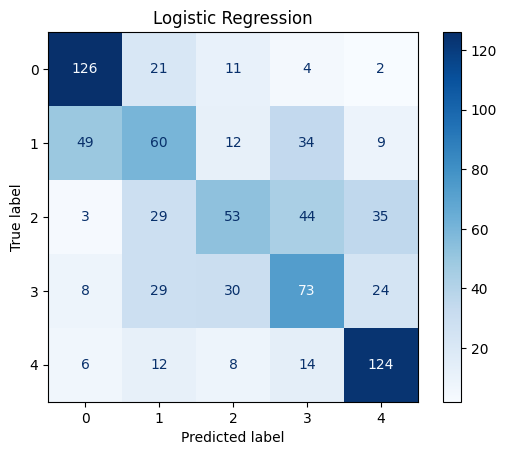

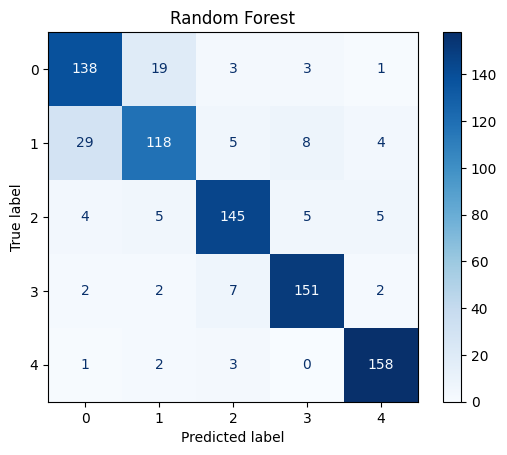

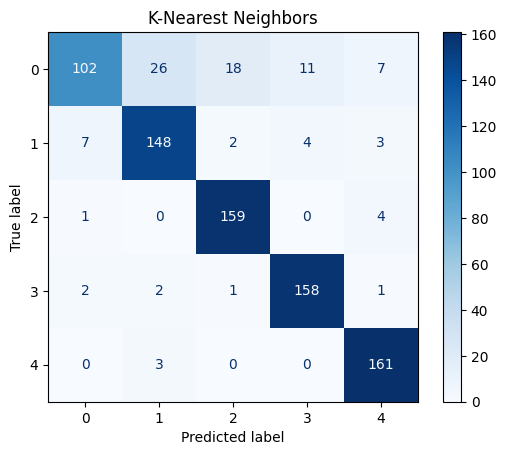

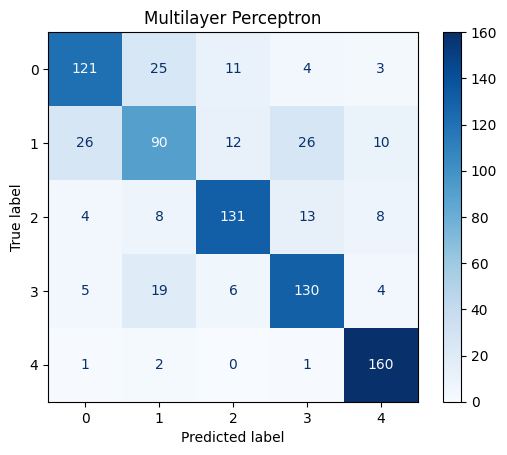

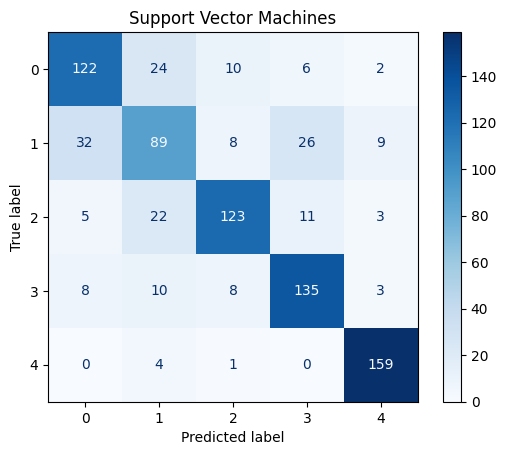

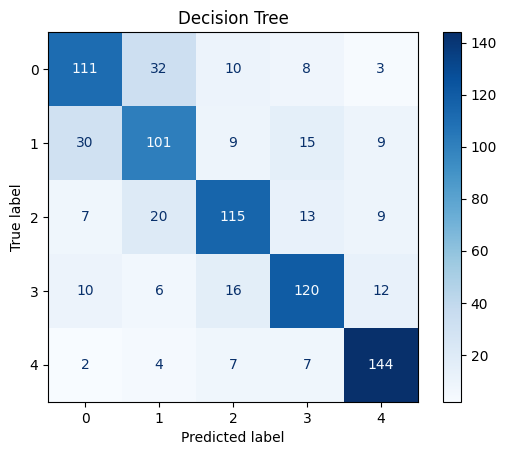

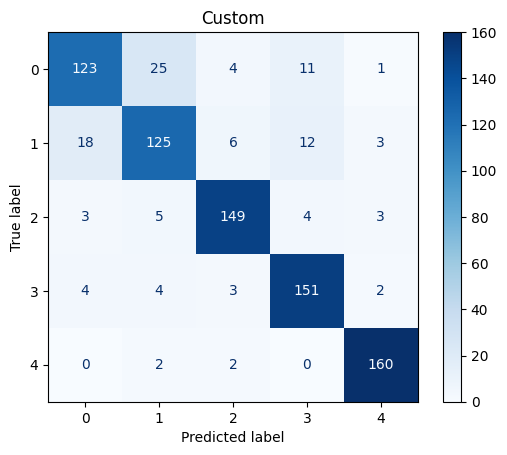

In [2814]:
names = ["Logistic Regression", "Random Forest", "K-Nearest Neighbors", "Multilayer Perceptron", "Support Vector Machines", "Decision Tree", "Custom"]
for name, cm in zip(names, cm_lst):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_wearable.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(name)
    plt.show()